In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
data = pd.read_csv('Customer_Segmentation_export.csv')

In [17]:
np.random.seed(42)
n_customers = 100
data = pd.DataFrame({
    'Age': np.random.normal(40, 15, n_customers),
    'Income': np.random.normal(50000, 20000, n_customers),
    'SpendingScore': np.random.normal(50, 25, n_customers)
})

In [19]:
data = data[(data['Age'] > 0) & 
            (data['Income'] > 0) & 
            (data['SpendingScore'] >= 0) & 
            (data['SpendingScore'] <= 100)]

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

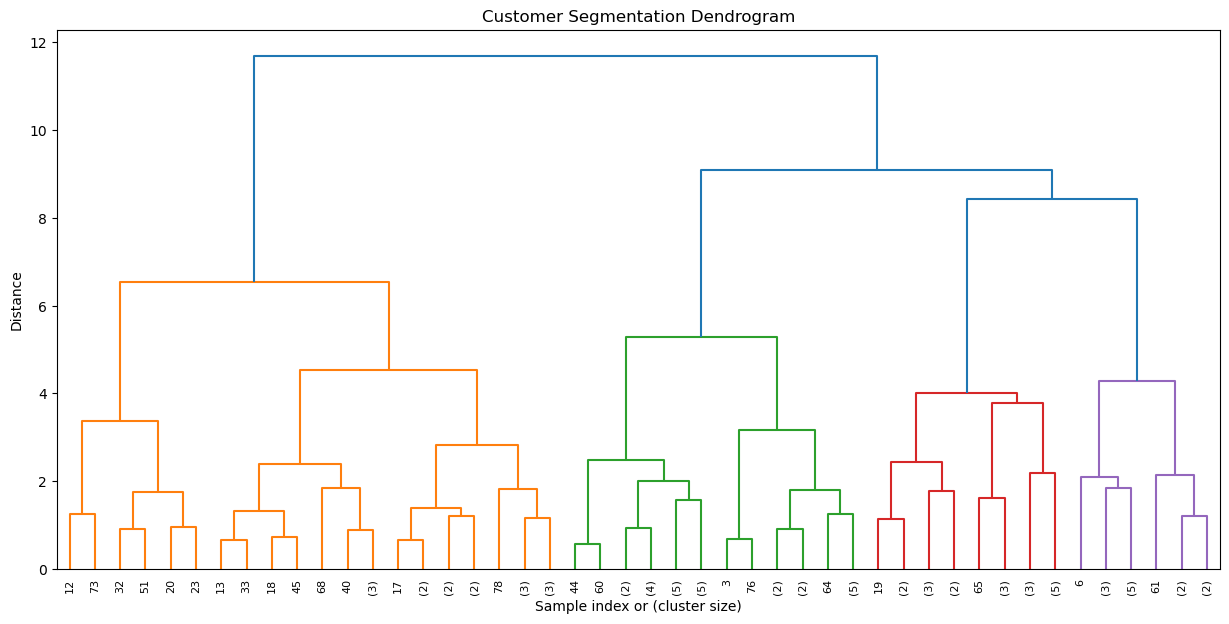

In [23]:
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Customer Segmentation Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

In [25]:
optimal_clusters = 3
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
cluster_labels = hc.fit_predict(data_scaled)


data['Cluster'] = cluster_labels


print("Segmented Data (first 5 rows):")
print(data.head())

Segmented Data (first 5 rows):
         Age        Income  SpendingScore  Cluster
0  47.450712  21692.585159      58.944684        2
1  37.926035  41587.093545      64.019613        2
2  49.715328  43145.709669      77.076281        2
3  62.845448  33954.454616      76.345051        2
4  36.487699  46774.285767      15.558266        0
